In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D ,AveragePooling2D,MaxPool2D
from tensorflow.keras import Model #as a parent class

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0



In [3]:
x_train.shape     

(60000, 28, 28)

In [4]:
# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(buffer_size=len(x_train)).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [7]:
class MyModel(Model): 
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu',)
    self.d2 = Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()

In [8]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

In [9]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [10]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [11]:
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [12]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch + 1,
                        train_loss.result(),
                        train_accuracy.result() * 100,
                        test_loss.result(),
                        test_accuracy.result() * 100))

Epoch 1, Loss: 0.1381230503320694, Accuracy: 95.8133316040039, Test Loss: 0.0644097626209259, Test Accuracy: 97.80999755859375
Epoch 2, Loss: 0.044249724596738815, Accuracy: 98.58499908447266, Test Loss: 0.058060094714164734, Test Accuracy: 98.23999786376953
Epoch 3, Loss: 0.023863473907113075, Accuracy: 99.21666717529297, Test Loss: 0.05523069202899933, Test Accuracy: 98.29999542236328
Epoch 4, Loss: 0.01433101762086153, Accuracy: 99.54000091552734, Test Loss: 0.06043398007750511, Test Accuracy: 98.25999450683594
Epoch 5, Loss: 0.0101263877004385, Accuracy: 99.68333435058594, Test Loss: 0.06107733026146889, Test Accuracy: 98.18000030517578


# Lenet

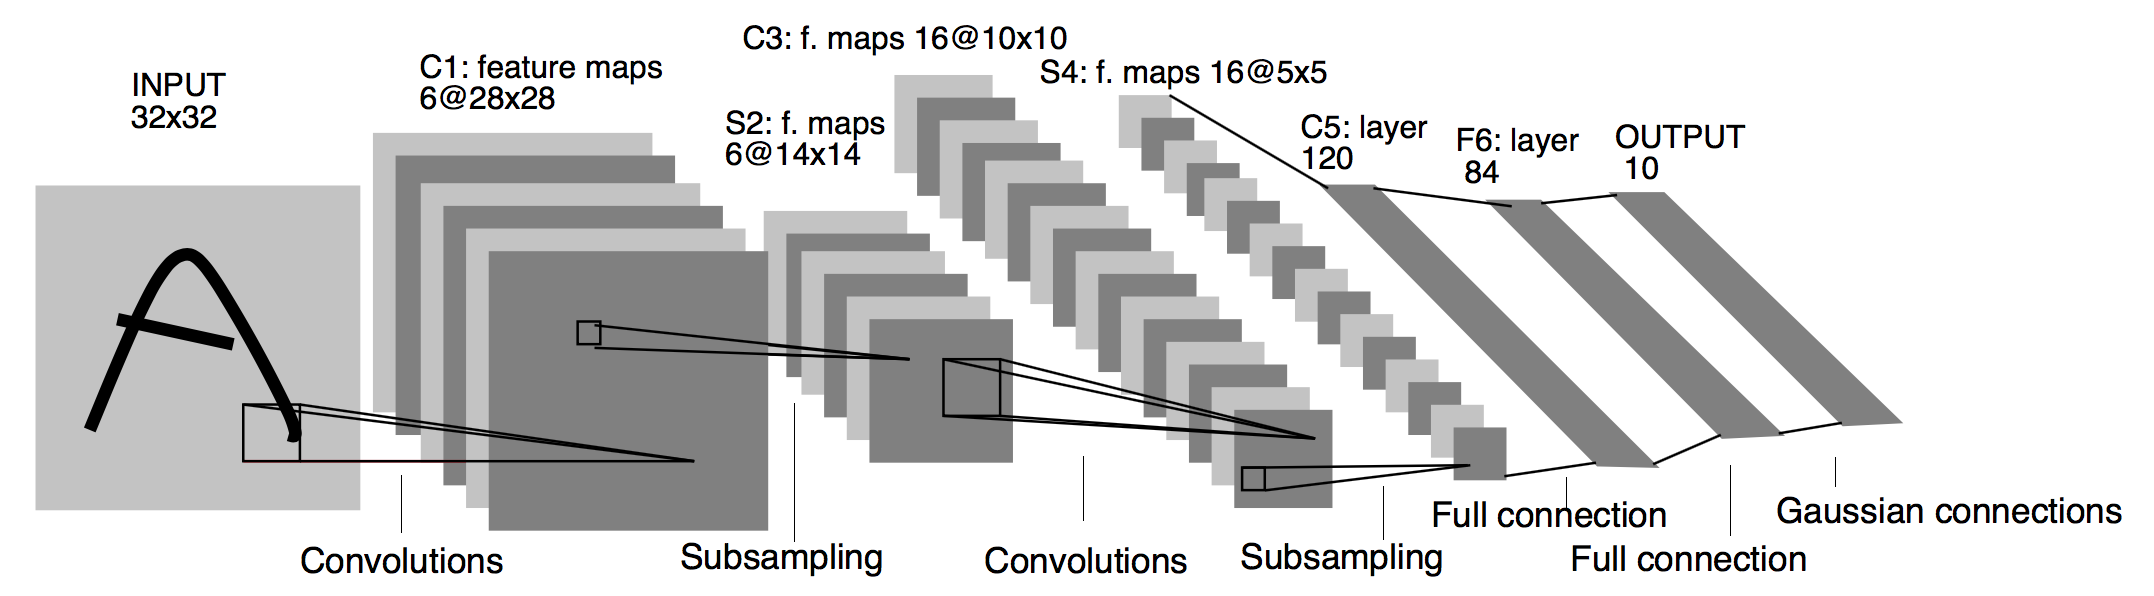

In [13]:
class Lenet(Model):
  def __init__(self):
    super(Lenet, self).__init__()
    self.conv1 = Conv2D(6, 5, activation='relu')
    self.conv2 = Conv2D(16, 5, activation='relu')
    self.pool1 = AveragePooling2D(pool_size=(2, 2),strides=2)
    self.pool2 = AveragePooling2D(pool_size=(2, 2),strides=2)
    self.flatten = Flatten()
    self.d1 = Dense(120, activation='relu')
    self.d2 = Dense(84, activation='relu')
    self.d3 = Dense(10,)

  def call(self, x):
    x = self.conv1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.pool2(x)
    x = self.flatten(x)
    x = self.d1(x)
    x = self.d2(x)


    return self.d3(x)

# Create an instance of the model
model = Lenet()

In [14]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()


train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')



@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)
    
    
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)    
    
    
    
    
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch + 1,
                        train_loss.result(),
                        train_accuracy.result() * 100,
                        test_loss.result(),
                        test_accuracy.result() * 100))    

Epoch 1, Loss: 0.22360828518867493, Accuracy: 93.13500213623047, Test Loss: 0.0742640420794487, Test Accuracy: 97.58999633789062
Epoch 2, Loss: 0.07129804790019989, Accuracy: 97.7933349609375, Test Loss: 0.051665376871824265, Test Accuracy: 98.36000061035156
Epoch 3, Loss: 0.04928570240736008, Accuracy: 98.50166320800781, Test Loss: 0.048401832580566406, Test Accuracy: 98.5199966430664
Epoch 4, Loss: 0.03840974345803261, Accuracy: 98.74500274658203, Test Loss: 0.03482970595359802, Test Accuracy: 98.86000061035156
Epoch 5, Loss: 0.031976670026779175, Accuracy: 98.98832702636719, Test Loss: 0.03545086085796356, Test Accuracy: 98.94000244140625


# Alexnet


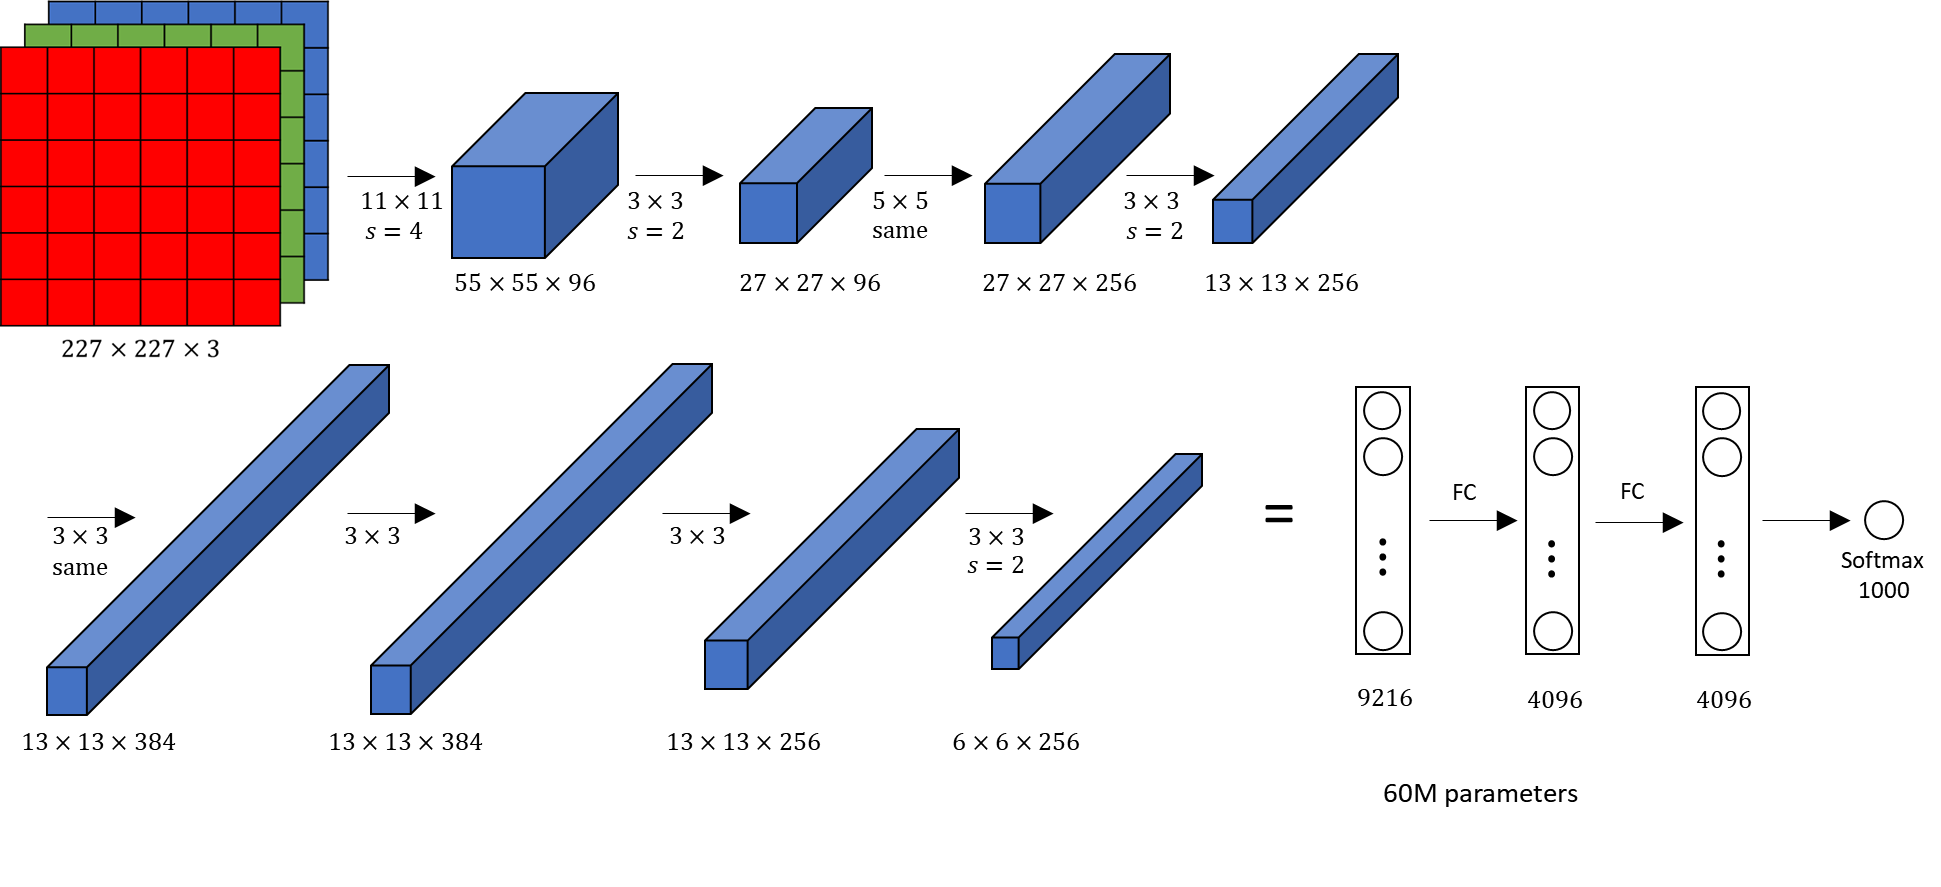

In [15]:
class Alexnet(Model):
  def __init__(self):
    super(Alexnet, self).__init__()
    self.conv1=tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11),activation="relu",strides=4),  
    self.pool1=tf.keras.layers.MaxPooling2D(pool_size=(3, 3),strides=2),
    self.conv2=tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5),activation="relu",padding="same") , 
    self.pool2=tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=2) ,
    self.conv3=tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3),activation="relu",padding="same") , 
    self.conv4=tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3),activation="relu",padding="same") , 
    self.conv5=tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3),activation="relu",padding="same") , 
    self.pool3=tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=2),  


    self.flatten=tf.keras.layers.Flatten(),



    self.d1=tf.keras.layers.Dense(4096,activation="relu"),
    self.d2=tf.keras.layers.Dense(4096,activation="relu"),
    self.d3=tf.keras.layers.Dense(10)  
    

  def call(self, x):
    x = self.conv1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.pool2(x)
    x = self.conv3(x)
    x = self.conv4(x)
    x = self.conv5(x)
    x = self.pool3(x)
    x = self.flatten(x)
    x = self.d1(x)
    x = self.d2(x)


    return self.d3(x)

# Create an instance of the model
model = Alexnet()

# INCEPTION

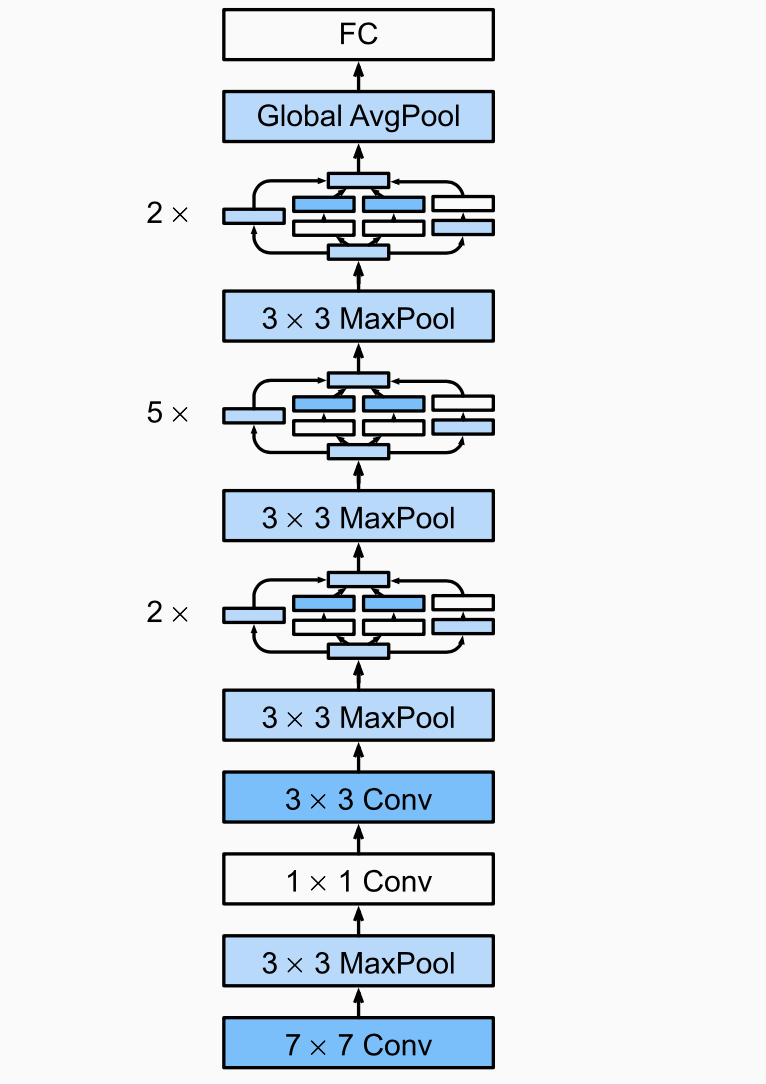

In [16]:
class Inception(tf.keras.Model):
    # c1 - c4 are the number of output channels for each layer in the path
    def __init__(self, c1, c2, c3, c4):
        super().__init__()
        # Path 1 is a single 1 x 1 convolutional layer
        self.p1_1 = tf.keras.layers.Conv2D(c1, 1, activation='relu')
        # Path 2 is a 1 x 1 convolutional layer followed by a 3 x 3
        # convolutional layer
        self.p2_1 = tf.keras.layers.Conv2D(c2[0], 1, activation='relu')
        self.p2_2 = tf.keras.layers.Conv2D(c2[1], 3, padding='same', activation='relu')
        # Path 3 is a 1 x 1 convolutional layer followed by a 5 x 5
        # convolutional layer
        self.p3_1 = tf.keras.layers.Conv2D(c3[0], 1, activation='relu')
        self.p3_2 = tf.keras.layers.Conv2D(c3[1], 5, padding='same', activation='relu')
        # Path 4 is a 3 x 3 maximum pooling layer followed by a 1 x 1
        # convolutional layer
        self.p4_1 = tf.keras.layers.MaxPool2D(3, 1, padding='same')
        self.p4_2 = tf.keras.layers.Conv2D(c4, 1, activation='relu')


    def call(self, x):
        p1 = self.p1_1(x)
        p2 = self.p2_2(self.p2_1(x))
        p3 = self.p3_2(self.p3_1(x))
        p4 = self.p4_2(self.p4_1(x))
        # Concatenate the outputs on the channel dimension
        return tf.keras.layers.Concatenate()([p1, p2, p3, p4])

In [17]:
class Inception_model(Model):
  def __init__(self):
    super(Inception_model, self).__init__()
    self.conv1=Conv2D(64, 7, strides=2, padding='same',activation='relu')  
    self.pool1=MaxPool2D(pool_size=3, strides=2, padding='same')
    self.conv2=Conv2D(64, 1, activation='relu')
    self.conv3=Conv2D(192, 3, padding='same', activation='relu')
    self.pool2=MaxPool2D(pool_size=3, strides=2, padding='same')
    self.i1=Inception(64, (96, 128), (16, 32), 32) 
    self.i2=Inception(128, (128, 192), (32, 96), 64)  
    self.pool3=MaxPool2D(pool_size=3, strides=2, padding='same') 
    self.i3=Inception(192, (96, 208), (16, 48), 64)
    self.i4=Inception(160, (112, 224), (24, 64), 64)
    self.i5=Inception(128, (128, 256), (24, 64), 64)
    self.i6=Inception(112, (144, 288), (32, 64), 64)
    self.i7=Inception(256, (160, 320), (32, 128), 128)
    self.pool4=MaxPool2D(pool_size=3, strides=2, padding='same')
    self.i8=Inception(256, (160, 320), (32, 128), 128)
    self.i9=Inception(384, (192, 384), (48, 128), 128)
    self.pool5=tf.keras.layers.GlobalAvgPool2D()
    self.flatten=tf.keras.layers.Flatten()
    self.d1=tf.keras.layers.Dense(1000)



    

  def call(self, x):
    x = self.conv1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.pool2(x)
    x = self.i1(x)
    x = self.i2(x)
    x = self.pool3(x)
    x = self.i3(x)
    x = self.i4(x)
    x = self.i5(x)
    x = self.i6(x)
    x = self.i7(x)
    x = self.pool4(x)
    x = self.i8(x)
    x = self.i9(x)
    x = self.pool5(x)
    x = self.flatten(x)
    x = self.d1(x)


    return x

# Create an instance of the model
model =Inception_model()

# RES NET

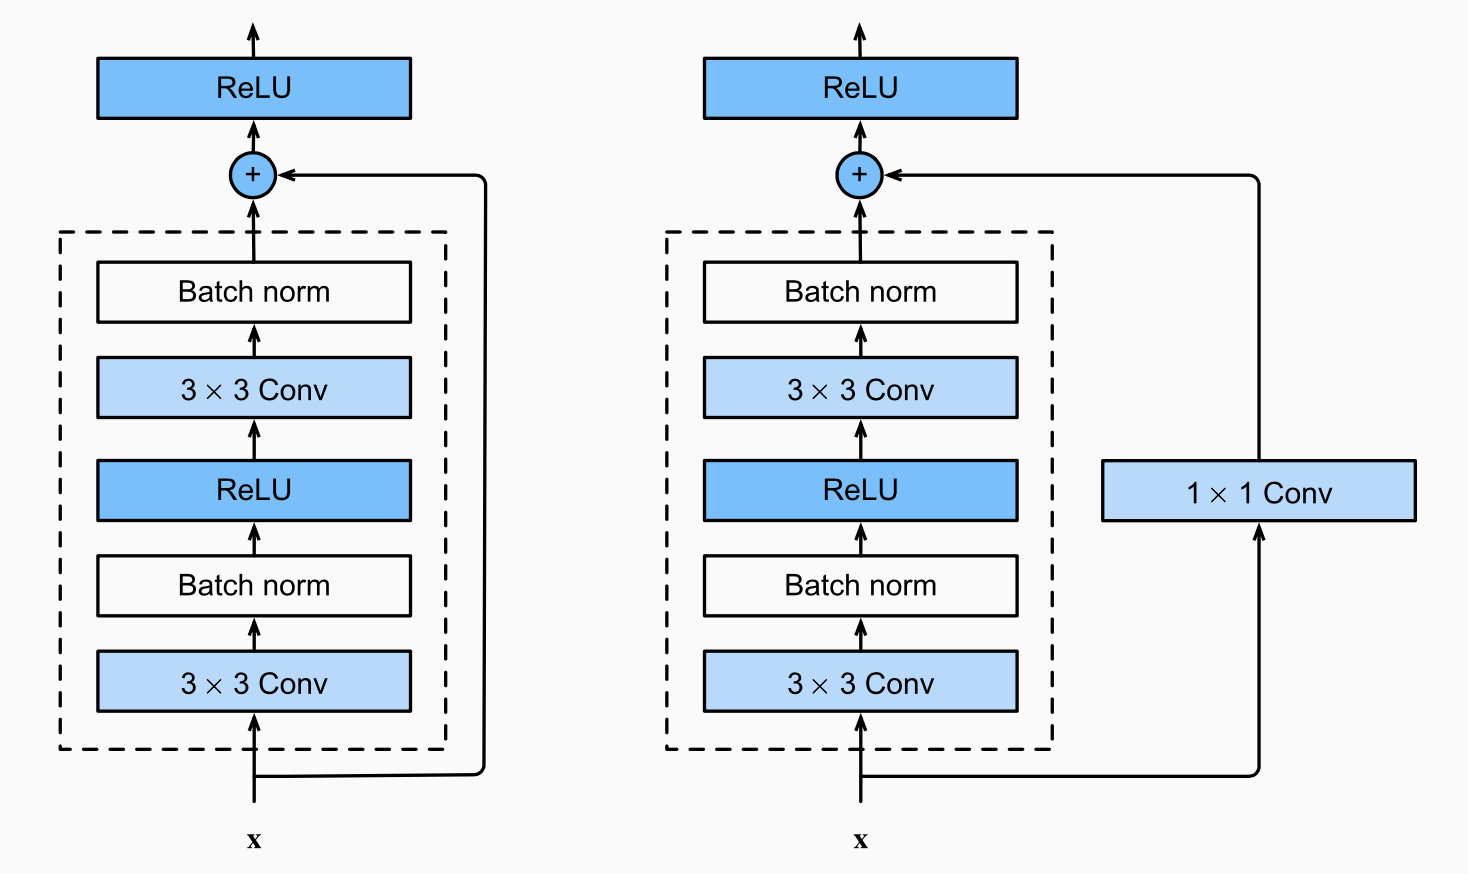

In [18]:
class Residual(tf.keras.Model):  #@save
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(
            num_channels, padding='same', kernel_size=3, strides=strides)
        self.conv2 = tf.keras.layers.Conv2D(
            num_channels, kernel_size=3, padding='same')
        self.conv3 = None
        if use_1x1conv:
            self.conv3 = tf.keras.layers.Conv2D(
                num_channels, kernel_size=1, strides=strides)
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.bn2 = tf.keras.layers.BatchNormalization()

    def call(self, X):
        Y = tf.keras.activations.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))#g(x)
        if self.conv3 is not None:
            X = self.conv3(X)
        Y += X #g(x)+x if 1*1 is False if 1*1 is true g(x)+x2
        return tf.keras.activations.relu(Y)

In [19]:
class ResnetBlock(tf.keras.layers.Layer):
    def __init__(self, num_channels, num_residuals, first_block=False, **kwargs):
        super(ResnetBlock, self).__init__(**kwargs)
        self.residual_layers = []
        for i in range(num_residuals):
            if i == 0 and not first_block:
                self.residual_layers.append(Residual(num_channels, use_1x1conv=True, strides=2))
            else:
                self.residual_layers.append(Residual(num_channels))

    def call(self, X):
        for layer in self.residual_layers.layers:
            X = layer(X)
        return X

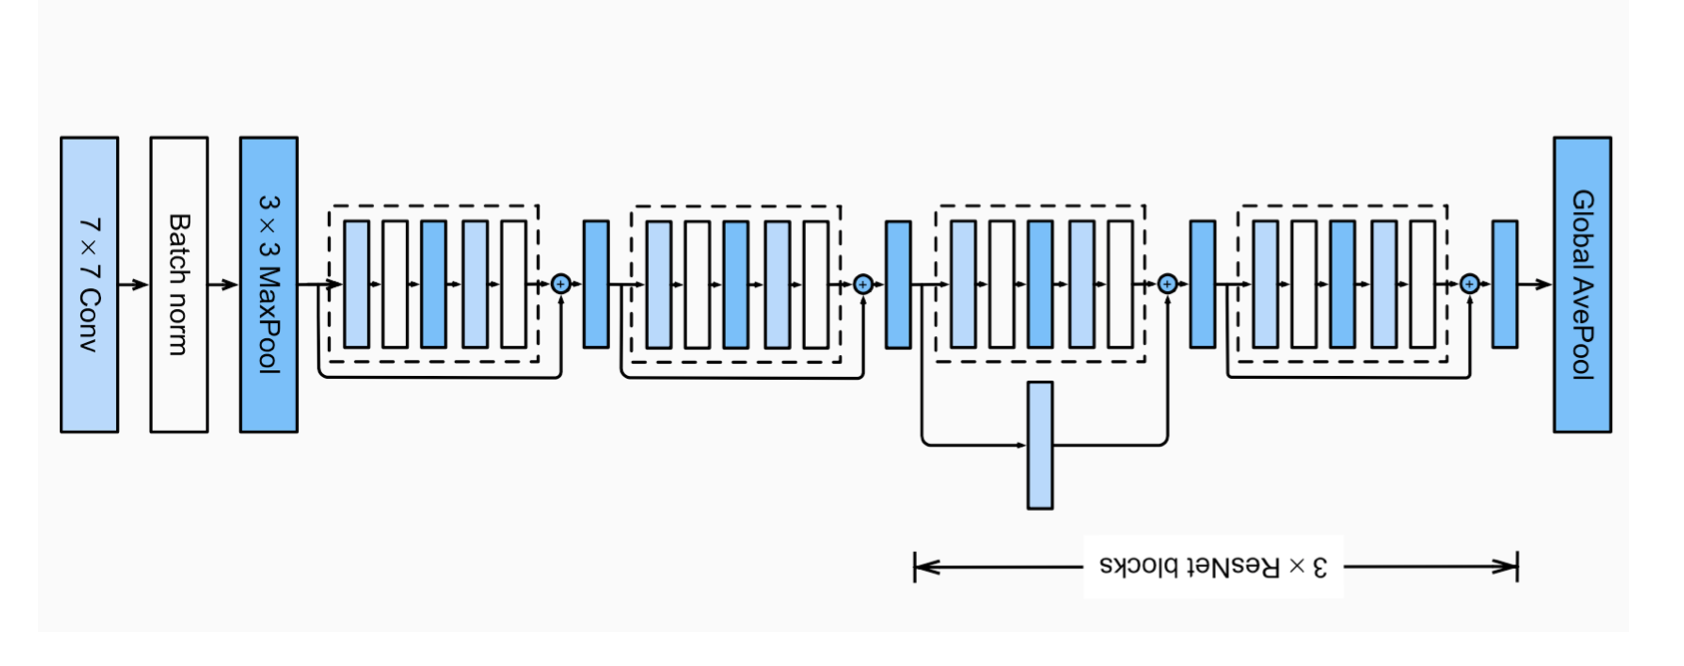

In [20]:
def net():
    return tf.keras.Sequential([
        # The following layers are the same as b1 that we created earlier.
        tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same'),
        # The following layers are the same as b2, b3, b4, and b5 that we
        # created earlier
        ResnetBlock(64, 2, first_block=True),
        ResnetBlock(128, 2),
        ResnetBlock(256, 2),
        ResnetBlock(512, 2),
        tf.keras.layers.GlobalAvgPool2D(),
        tf.keras.layers.Dense(units=10)])